In [58]:
import pandas as pd


df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [59]:
print(df_train.info())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [60]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# Comprobamos si en df_train hay valores nulos
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
# Rellenamos con la media los valores de la colimna Age
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
# Suponiendo que 'df' es tu DataFrame
df_train['Cabin'].fillna('Unknown', inplace=True)
df_train['Embarked'].fillna('Unknown', inplace=True)

In [63]:

# Comprobamos si en df_train hay valores nulos
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [64]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


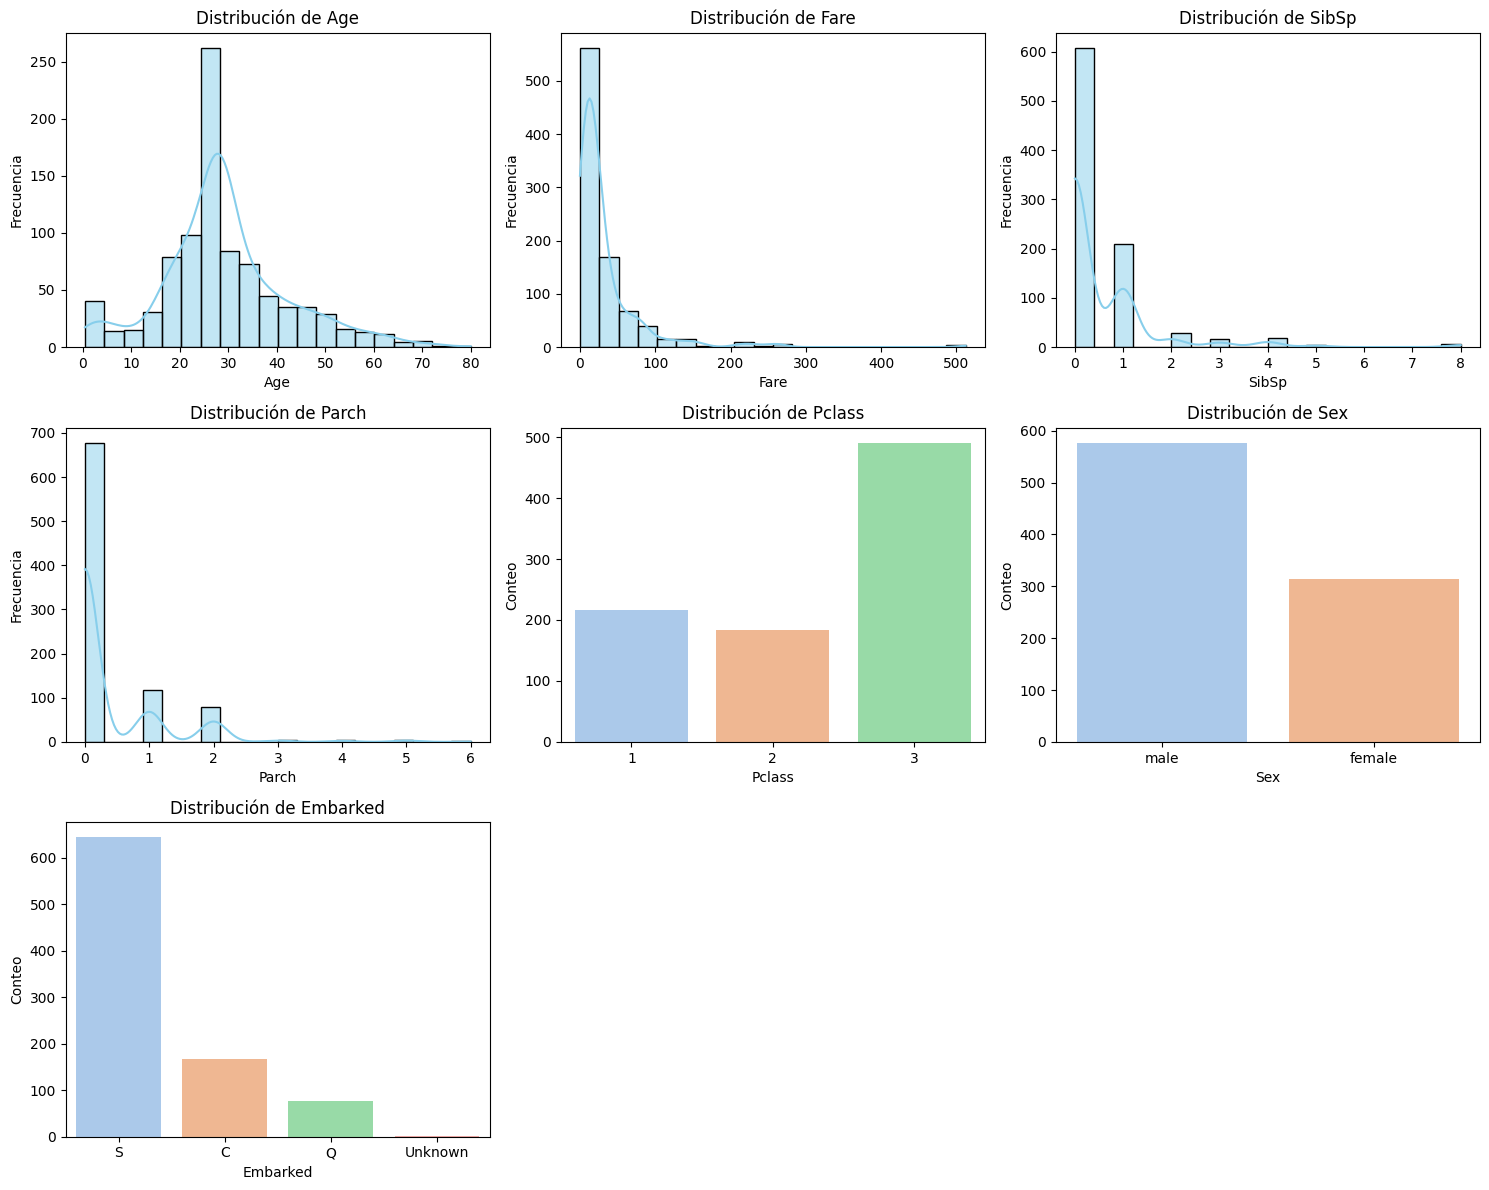

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos para visualizar las distribuciones de los datos
def visualizar_distribuciones(df):
    # Configurar el tamaño de la figura
    plt.figure(figsize=(15, 12))
    
    # Crear histogramas para las columnas numéricas
    columnas_numericas = ['Age', 'Fare', 'SibSp', 'Parch']
    for i, columna in enumerate(columnas_numericas, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[columna].dropna(), bins=20, kde=True, color='skyblue')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
    
    # Crear gráficos de barras para las columnas categóricas
    columnas_categoricas = ['Pclass', 'Sex', 'Embarked']
    for i, columna in enumerate(columnas_categoricas, len(columnas_numericas) + 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=columna, palette='pastel')
        plt.title(f'Distribución de {columna}')
        plt.xlabel(columna)
        plt.ylabel('Conteo')
    
    # Ajustar el diseño para que no se superpongan los gráficos
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar las distribuciones
visualizar_distribuciones(df_train)

Correlaciones con 'Survived':
Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


/tmp/ipykernel_159517/234672432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_train.corr()


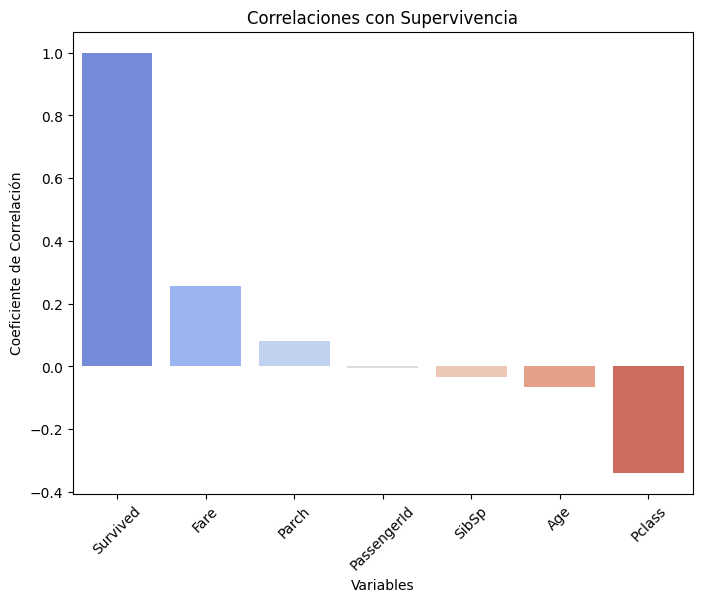

In [67]:
# Calcular la tabla de correlaciones
correlaciones = df_train.corr()

# Extraer las correlaciones con respecto a 'Survived'
correlacion_survived = correlaciones['Survived'].sort_values(ascending=False)

# Mostrar las correlaciones con 'Survived'
print("Correlaciones con 'Survived':")
print(correlacion_survived)

# Visualizar las correlaciones con 'Survived' usando un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=correlacion_survived.index, y=correlacion_survived.values, palette='coolwarm')
plt.title('Correlaciones con Supervivencia')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de Correlación')
plt.xticks(rotation=45)
plt.show()

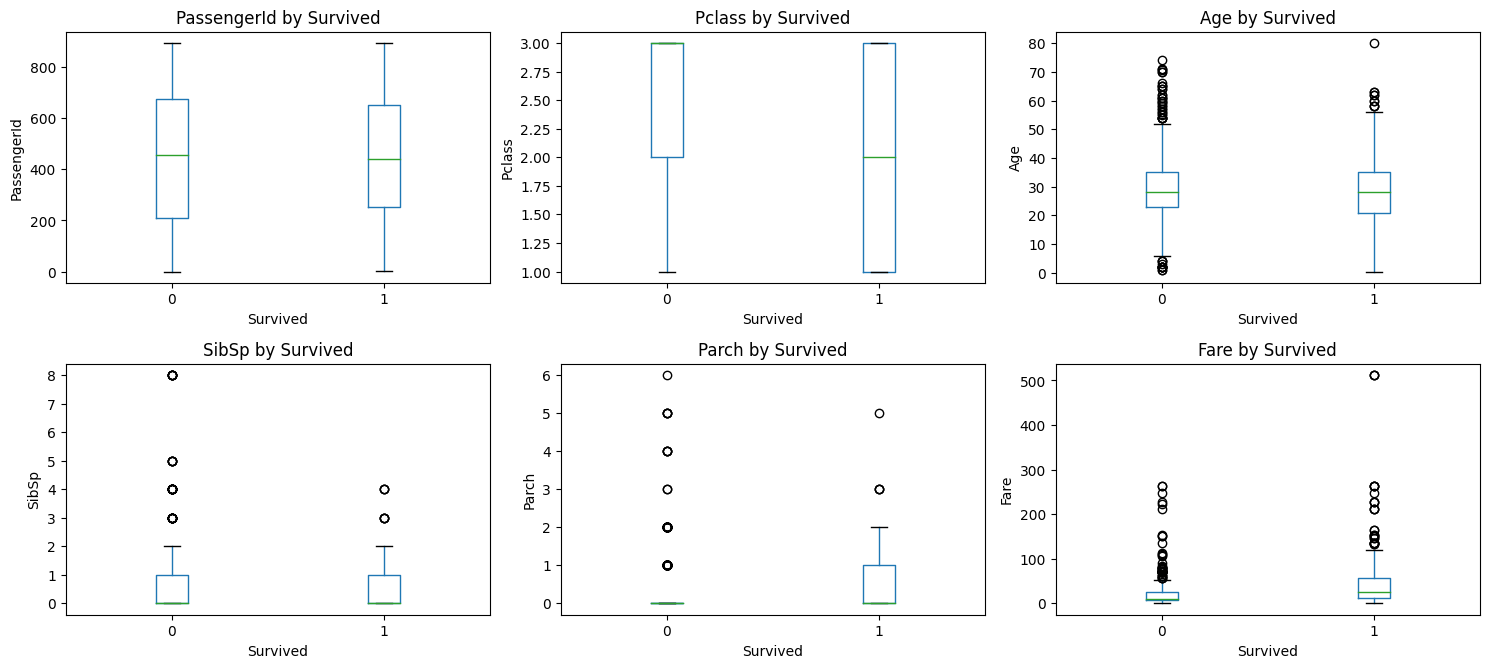

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_train es tu DataFrame y 'Survived' es la columna de resultado
# Selecciona solo las columnas numéricas
columns = df_train.select_dtypes(include=['float64', 'int64']).columns.drop('Survived')
outcome = df_train['Survived']

# Configurar el número de filas y columnas de subplots
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

# Crear gráficos de caja por cada columna
for i, col in enumerate(columns):
    ax = axes[i]
    df_train.boxplot(column=[col], by='Survived', ax=ax, grid=False)
    ax.set_title(f'{col} by Survived')
    ax.set_xlabel('Survived')
    ax.set_ylabel(col)

# Quitar gráficos sobrantes si hay menos columnas que subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superpuesto por defecto
plt.show()

---

# Regresión Logística

### Benchmark

Imputación valores faltantes, eliminamos coluimnas innecesarias, conversión de cariables categóricas a numéricas, división de datos y entrenamiento de modelo

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de entrenamiento
df_train = pd.read_csv('train.csv')

# Preprocesamiento básico: imputar valores faltantes
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# Eliminar columnas innecesarias
df_train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Convertir las columnas categóricas a numéricas
# Convertir 'Sex' a 0 (male) y 1 (female)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

# Convertir 'Embarked' a valores numéricos usando LabelEncoder
label_encoder = LabelEncoder()
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

# Dividir en características (X) y variable objetivo (y)
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo básico de regresión logística
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predecir y evaluar el rendimiento en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Mostrar las métricas del modelo benchmark
print("Modelo Benchmark - Métricas en el conjunto de entrenamiento/test:")
print(classification_report(y_test, y_pred))

Modelo Benchmark - Métricas en el conjunto de entrenamiento/test:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### Modelo Benchmark sobre df_test y comparar con df_gender_submission

In [70]:
# Cargar el conjunto de test y el archivo de resultados reales
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

# Preprocesar df_test (eliminar columnas innecesarias)
df_test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# Imputar valores faltantes en df_test (igual que en df_train)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# Imputar valores faltantes en 'Fare' en df_test
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

# Convertir las columnas categóricas a numéricas (de la misma forma que en df_train)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = label_encoder.transform(df_test['Embarked'])  # Usamos el encoder entrenado previamente

# Predecir sobre el conjunto de test
y_pred_test = log_reg.predict(df_test)

# Crear un DataFrame con las predicciones y el PassengerId
df_results = pd.DataFrame({
    'PassengerId': df_gender_submission['PassengerId'],
    'Survived_pred': y_pred_test
})

# Comparar las predicciones con los valores reales de df_gender_submission
df_comparison = pd.merge(df_results, df_gender_submission, on='PassengerId', how='left')

# Mostrar las métricas
print("Evaluación sobre df_test usando el modelo Benchmark:")
print(classification_report(df_comparison['Survived'], df_comparison['Survived_pred']))

Evaluación sobre df_test usando el modelo Benchmark:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



### Nuevo modelo con ajustes

Imputación de valores faltantes, Escalado de características, Codificacion de variables categóricas OneHotEncoder y entrenamiento.

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Crear el preprocesador: imputación y escalado de las características numéricas
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Embarked']

# Explicación preprocessor
# ColumnTransformer e encarga de realizar varias transformaciones sobre los datos para preparar 
# las características antes de ser alimentadas al modelo de machine learning.
'''
1. Imputación de valores faltantes
    - Para las características numéricas (Age, Fare):
        - La imputación se realiza con la mediana de cada columna, utilizando el SimpleImputer. 
        - Esto significa que cualquier valor faltante en estas columnas será reemplazado por el valor de la mediana de la columna.
    - Para las características categóricas (Embarked):
        -Se utiliza la moda (el valor más frecuente) para imputar los valores faltantes en la columna Embarked.
        
2. Escalado de características numéricas
    - Para las características numéricas (Age, Fare, etc.):
    -Se utiliza un StandardScaler, que normaliza las columnas numéricas para que tengan media cero y desviación estándar uno. 
    Esto es útil porque, en modelos como la regresión logística, las características escaladas permiten que el modelo 
    aprenda de manera más eficiente y equilibrada, evitando que características con escalas más grandes dominen el aprendizaje.
    
3. Codificación de variables categóricas
    - Para las características categóricas (Sex, Embarked):
        - El OneHotEncoder convierte las columnas categóricas en variables binarias (0 o 1), creando una nueva columna para cada categoría única. 
        Por ejemplo:
            -Si Sex tiene dos categorías (male y female)
                - male se codifica como 1 
                - female como 0.
            - Similarmente, Embarked, que podría tener valores como S, C, y Q, 
            será codificado en tres columnas binarias 
                - Embarked_S,
                - Embarked_C, 
                - Embarked_Q
'''
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Usar la mediana para la imputación
            ('scaler', StandardScaler())                    # Escalar las características numéricas
        ]), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda para los valores faltantes
            ('onehot', OneHotEncoder(handle_unknown='ignore'))      # Codificación One-Hot para variables categóricas
        ]), categorical_cols)
    ])



# Crear el pipeline para la regresión logística con preprocesamiento
'''
Pipeline es automatizar el flujo de trabajo, garantizando que los pasos de preprocesamiento se realicen siempre de manera 
consistente en los datos de entrenamiento y prueba.
    - preprocessor es el primer paso del pipeline y es responsable de realizar todas las transformaciones necesarias sobre
        los datos de entrada antes de pasarlos al modelo de regresión logística.
    - classifier es el segundo paso del pipeline y se refiere al modelo de regresión logística que estamos utilizando para 
        realizar las predicciones
        - max_iter=200: Este parámetro establece el número máximo de iteraciones que el algoritmo de optimización de la 
                        regresión logística debe realizar para converger
        - C=0.1: Este es el parámetro de regularización. el parámetro C controla el equilibrio entre ajustar bien los datos 
                y evitar el sobreajuste.
'''
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200, C=0.1))  # Ajuste del parámetro C (regularización)
])

# Entrenar el modelo ajustado con el preprocesamiento
pipeline.fit(X_train, y_train)

# Predecir y evaluar el rendimiento en el conjunto de prueba
y_pred_adjusted = pipeline.predict(X_test)

# Mostrar las métricas del nuevo modelo ajustado
print("Nuevo Modelo Ajustado - Métricas en el conjunto de entrenamiento/test:")
print(classification_report(y_test, y_pred_adjusted))


Nuevo Modelo Ajustado - Métricas en el conjunto de entrenamiento/test:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### Nuevo modelo sobre df_test y compararlo con df_gender_submission

In [72]:
# Cargar el conjunto de test y el archivo de resultados reales
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

# Preprocesar df_test (eliminar columnas innecesarias)
df_test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# Imputar valores faltantes en df_test (igual que en df_train)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# Imputar valores faltantes en 'Fare' en df_test
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

# Convertir las columnas categóricas a numéricas (de la misma forma que en df_train)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = label_encoder.transform(df_test['Embarked'])  # Usamos el encoder entrenado previamente



# Predecir sobre el conjunto de test con el nuevo modelo ajustado
y_pred_test = pipeline.predict(df_test)

# Crear un DataFrame con las predicciones y el PassengerId
df_results = pd.DataFrame({
    'PassengerId': df_gender_submission['PassengerId'],
    'Survived_pred': y_pred_test
})

# Comparar las predicciones con los valores reales de df_gender_submission
df_comparison = pd.merge(df_results, df_gender_submission, on='PassengerId', how='left')

# Mostrar las métricas para el nuevo modelo
print("Evaluación sobre df_test usando el nuevo modelo ajustado:")
print(classification_report(df_comparison['Survived'], df_comparison['Survived_pred']))


Evaluación sobre df_test usando el nuevo modelo ajustado:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       266
           1       0.95      0.97      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



### Más ajustes al modelos para comparar - GridSearchCV


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Crear el preprocesador: imputación y escalado de las características numéricas
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Sex', 'Embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Imputación con la mediana
            ('scaler', StandardScaler())                    # Escalado de las características numéricas
        ]), numeric_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación con la moda
            ('onehot', OneHotEncoder(handle_unknown='ignore'))      # Codificación One-Hot
        ]), categorical_cols)
    ])

# Crear el pipeline para la regresión logística con preprocesamiento
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))  # Ajuste en max_iter
])

# Definir los hiperparámetros que queremos ajustar con GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Probar diferentes valores de C
    'classifier__max_iter': [100, 200, 300]    # Probar diferentes valores de max_iter
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros encontrados por GridSearchCV:", grid_search.best_params_)

# Predecir y evaluar el rendimiento en el conjunto de prueba con el mejor modelo
y_pred_adjusted = grid_search.predict(X_test)

# Mostrar las métricas del nuevo modelo ajustado
print("Nuevo Modelo Ajustado con GridSearchCV - Métricas en el conjunto de entrenamiento/test:")
print(classification_report(y_test, y_pred_adjusted))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Mejores parámetros encontrados por GridSearchCV: {'classifier__C': 10, 'classifier__max_iter': 100}
Nuevo Modelo Ajustado con GridSearchCV - Métricas en el conjunto de entrenamiento/test:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Nuevo modelo sobre df_test y compararlo con df_gender_submission - GridSearchCV

In [74]:
# Cargar el conjunto de test y el archivo de resultados reales (si no lo hemos hecho previamente)
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

# Preprocesar df_test (eliminar columnas innecesarias)
df_test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# Imputar valores faltantes en df_test (igual que en df_train)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# Imputar valores faltantes en 'Fare' en df_test
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

# Convertir las columnas categóricas a numéricas (de la misma forma que en df_train)
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = label_encoder.transform(df_test['Embarked'])  # Usamos el encoder entrenado previamente

# Aplicar el modelo ajustado con GridSearchCV (el modelo ya está entrenado)
y_pred_test = grid_search.predict(df_test)

# Crear un DataFrame con las predicciones y el PassengerId
df_results = pd.DataFrame({
    'PassengerId': df_gender_submission['PassengerId'],
    'Survived_pred': y_pred_test
})

# Comparar las predicciones con los valores reales de df_gender_submission
df_comparison = pd.merge(df_results, df_gender_submission, on='PassengerId', how='left')

# Mostrar las métricas para el nuevo modelo ajustado aplicado a df_test
print("Evaluación sobre df_test usando el modelo ajustado con GridSearchCV:")
print(classification_report(df_comparison['Survived'], df_comparison['Survived_pred']))


Evaluación sobre df_test usando el modelo ajustado con GridSearchCV:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       266
           1       0.95      0.97      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



# Más ajustes - Balanceo de clases - Sin GridSearchCV

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Crear el modelo de regresión logística con el parámetro class_weight='balanced'
log_reg = LogisticRegression(max_iter=200, C=1, class_weight='balanced')

# Entrenar el modelo ajustado con el preprocesamiento
log_reg.fit(X_train, y_train)

# Predecir y evaluar el rendimiento en el conjunto de prueba
y_pred_adjusted = log_reg.predict(X_test)

# Mostrar las métricas del nuevo modelo ajustado
print("Nuevo Modelo Ajustado con class_weight='balanced' - Métricas en el conjunto de entrenamiento/test:")
print(classification_report(y_test, y_pred_adjusted))


Nuevo Modelo Ajustado con class_weight='balanced' - Métricas en el conjunto de entrenamiento/test:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       105
           1       0.76      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.82      0.82       179



In [78]:
# Preprocesar df_test (eliminar columnas innecesarias)
# df_test.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# # Imputar valores faltantes en df_test (igual que en df_train)
# df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
# df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

# # Imputar valores faltantes en 'Fare' en df_test
# df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

# # Convertir las columnas categóricas a numéricas (de la misma forma que en df_train)
# df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
# df_test['Embarked'] = label_encoder.transform(df_test['Embarked'])  # Usamos el encoder entrenado previamente

# Predecir sobre el conjunto de test
y_pred_test = log_reg.predict(df_test)

# Crear un DataFrame con las predicciones y el PassengerId
df_results = pd.DataFrame({
    'PassengerId': df_gender_submission['PassengerId'],
    'Survived_pred': y_pred_test
})

# Comparar las predicciones con los valores reales de df_gender_submission
df_comparison = pd.merge(df_results, df_gender_submission, on='PassengerId', how='left')

# Mostrar las métricas para el nuevo modelo ajustado
print("Evaluación sobre df_test usando el modelo ajustado con class_weight='balanced':")
print(classification_report(df_comparison['Survived'], df_comparison['Survived_pred']))

Evaluación sobre df_test usando el modelo ajustado con class_weight='balanced':
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       266
           1       0.80      0.97      0.88       152

    accuracy                           0.90       418
   macro avg       0.89      0.92      0.90       418
weighted avg       0.92      0.90      0.91       418



---

# Resumen

| Modelo                               | precision_0 | recall_0 | f1_0 | precision_1 | recall_1 | f1_1 | accuracy | macro_avg_precision | macro_avg_recall | macro_avg_f1 | weighted_avg_precision | weighted_avg_recall | weighted_avg_f1 |
|--------------------------------------|-------------|----------|------|-------------|----------|------|----------|----------------------|-------------------|--------------|------------------------|---------------------|------------------|
| Benchmark (Train)                    | 0.83        | 0.86     | 0.84 | 0.79        | 0.74     | 0.76 | 0.81     | 0.81                 | 0.80              | 0.80         | 0.81                   | 0.81                | 0.81             |
| Benchmark (Test)                     | 0.97        | 0.95     | 0.96 | 0.92        | 0.95     | 0.94 | 0.95     | 0.95                 | 0.95              | 0.95         | 0.95                   | 0.95                | 0.95             |
| Modelo Ajustado (Train)              | 0.79        | 0.85     | 0.82 | 0.76        | 0.69     | 0.72 | 0.78     | 0.78                 | 0.77              | 0.77         | 0.78                   | 0.78                | 0.78             |
| Modelo Ajustado (Test)               | 0.98        | 0.97     | 0.98 | 0.95        | 0.97     | 0.96 | 0.97     | 0.97                 | 0.97              | 0.97         | 0.97                   | 0.97                | 0.97             |
| GridSearchCV (Train)                 | 0.80        | 0.87     | 0.83 | 0.78        | 0.69     | 0.73 | 0.79     | 0.79                 | 0.78              | 0.78         | 0.79                   | 0.79                | 0.79             |
| GridSearchCV (Test)                  | 0.98        | 0.97     | 0.98 | 0.95        | 0.97     | 0.96 | 0.97     | 0.97                 | 0.97              | 0.97         | 0.97                   | 0.97                | 0.97             |
| Balanceo de Clases (Train)           | 0.88        | 0.81     | 0.84 | 0.76        | 0.84     | 0.79 | 0.82     | 0.82                 | 0.82              | 0.82         | 0.83                   | 0.82                | 0.82             |
| Balanceo de Clases (Test)            | 0.98        | 0.86     | 0.92 | 0.80        | 0.97     | 0.88 | 0.90     | 0.89                 | 0.92              | 0.90         | 0.92                   | 0.90                | 0.91             |
